In [5]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import json
import pandas as pd
import sys
sys.path.append("D:\\Research_CAE\\MyTinyCUDANN\\tiny-cuda-nn\\main")
from tools import get_lambda_curve,get_loss_curve,get_result_table,get_lambda,my_relativeL2
main_path = os.path.dirname(os.path.abspath("__file__"))
print(main_path)
figure_path = os.path.join(main_path, "figs")
fs = 10
# plt.rcParams['font.size'] = fontsize
# plt.rcParams['figure.dpi'] = 100
# plt.rcParams['lines.linewidth'] = 2
params = {
    "text.usetex": True,
    "font.family": "serif",
    "font.size": fs,
    "pdf.fonttype":42,
    "figure.dpi":300,
    'lines.linewidth':1.5,
    'lines.markersize':3}

result_dict = {}

d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale


In [1]:
# loss_name_list = [
#     "PINN_lambda_ADAM_sin",
#     "PINN_energy_lambda_ADAM_sin",
#     "GridMLP_standard",
# ]
# label_list = [
    
#     "PINN(strong form)",
#     "PINN(energy form)",
#     "GridMLP(energy form)",
# ]

# for loss_name in loss_name_list:
#     loss_dict = get_lambda_curve(loss_name,main_path=main_path)
#     result_dict[loss_name] = loss_dict

# fig = plt.figure(figsize=(3,3.6))
# plt.rcParams.update(params)

# i = 0

# for loss_name in loss_name_list:
#     plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
#     plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.4)
#     i += 1
# plt.xlabel(r"$\lambda$")
# plt.ylabel("NRMSE")

# plt.yscale("log")
# # plt.yticks([1e-3,1e-2,1e-1,1e0,1e1])

# # Set minor y-ticks
# ax = plt.gca()  # Get current axis
# ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=12))


# plt.xscale("log")
# # plt.grid(alpha = 0.2)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
# fig.tight_layout()
# # plt.savefig(os.path.join(figure_path,"lambda_error.pdf"))
# plt.show()

In [47]:
loss_name_list = [
# "PINN_lambda_ADAM/config_8",
"PINN_energy_lambda_ADAM_sin/config_3",
"GridMLP_standard/config_8",
"GridMLP_decoupled_single_level/config_1",
"GridMLP_decoupled_paper/config_1",

]
task_path = os.path.join(main_path, "Tasks")
for loss_name in loss_name_list:
    print("{:.1e}".format(get_lambda(os.path.join(task_path,loss_name+".json"))))

label_list = [
# r"PINN(strong form; $\lambda = 10^3$)",
"PINN\n (energy form; $\lambda = 10^3$)",
"Cell-based MLP\n (energy form; $\lambda = 10^5$)",
"Single-level grid\n (energy form; decoupled)",
"Cell-based MLP\n (energy form; decoupled)",

]
for loss_name in loss_name_list:
    task_name,dir_name = loss_name.split("/")
    loss_dict = get_loss_curve(task_name,dir_name,main_path=main_path)
    result_dict[loss_name] = loss_dict

1.0e+03
1.0e+05
1.0e+00
1.0e+00


0.06598422027602177
0.00048823789850967783
0.008702215640490684
0.0004580228951616588


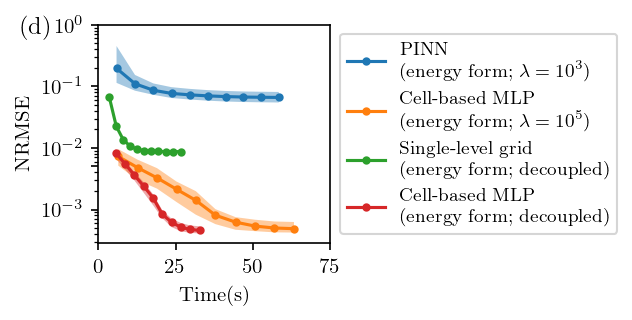

In [134]:
# for loss_name in loss_name_list:
#     task_name,dir_name = loss_name.split("/")
#     loss_dict = get_loss_curve(task_name,dir_name,main_path=main_path)

# fig = plt.figure(figsize=(2.5,3.2),dpi = 150)
fig, axs = plt.subplots(1, 1, figsize=(4.1,2), constrained_layout=True, dpi = 150)
plt.rcParams.update(params)
i = 0
for loss_name in loss_name_list:
    axs.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
    print(result_dict[loss_name]["y"][-1])
    axs.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.4)
    i += 1
axs.set_xlabel("Time(s)")
# plt.ylabel("Relative RMSE")
axs.set_ylabel("NRMSE")
axs.set_yscale("log")
axs.set_yticks([5e-3,1e-3,1e-2,1e-1,1e0])
axs.set_xticks([0,25,50,75])

# Set minor y-ticks
# ax = plt.gca()  # Get current axis
axs.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=12))
# plt.xscale("log")
# plt.grid(alpha = 0.2)
# plt.legend()
# axs.legend(loc='upper center', bbox_to_anchor=(0.4, -0.32), fontsize = fs)
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fs-1)
# axs.legend(fontsize = fs-1)
fig.text(0.02, 0.99, '(d)', fontsize=fs+2, va='top', ha='left')
# fig.tight_layout()
plt.savefig(os.path.join(figure_path,"training_loss.pdf"), dpi=300)
plt.show()

In [29]:
'''

loss_name_list = [
# "PINN_lambda_ADAM/config_8",
"PINN_energy_lambda_ADAM_sin/config_3",
"GridMLP_standard/config_8",
"GridMLP_decoupled_paper/config_1",
# "GridMLP_decoupled_1feature/config_1",
]
task_path = os.path.join(main_path, "Tasks")
for loss_name in loss_name_list:
    print("{:.1e}".format(get_lambda(os.path.join(task_path,loss_name+".json"))))

label_list = [
# r"PINN(strong form; $\lambda = 10^3$)",
r"PINN(energy form; $\lambda = 10^3$)",
r"CellMLP(energy form; $\lambda = 10^5$)",
"CellMLP (energy form; decoupled)",
]


for loss_name in loss_name_list:
    task_name,dir_name = loss_name.split("/")
    loss_dict = get_loss_curve(task_name,dir_name,main_path=main_path)
    result_dict[loss_name] = loss_dict
'''

from PDE import multiscale_equation
import torch
resolution = 501
field_min,field_max = 0,1
x1_list = np.linspace(field_min, field_max, resolution)
x2_list = np.linspace(field_min, field_max, resolution)
X1,X2 = np.meshgrid(x1_list,x2_list)
X_field = torch.tensor(np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis = 1)).float()

equation_high = multiscale_equation(eps = 0.125)
a_field_high = equation_high.a(X_field).numpy().reshape(resolution,resolution)
equation_low = multiscale_equation(eps = 1.0)
a_field_low = equation_low.a(X_field).numpy().reshape(resolution,resolution)

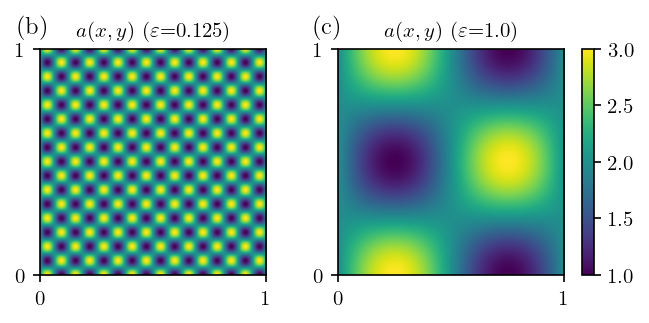

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(4.2,2), constrained_layout=True, dpi = 150)
plt.rcParams.update(params)
text_y = 1
# subplot 0
axs[0].imshow(a_field_high,origin = 'lower',interpolation = None,vmin=1,vmax=3)
axs[0].set_xticks([0,resolution],[0,1])
axs[0].set_yticks([0,resolution],[0,1])
axs[0].set_title(r'$a(x,y)$ ($\varepsilon$={})'.format(equation_high.eps),fontsize=fs)
# axs[0].set_title(r'$\varepsilon$={}'.format(equation_high.eps),fontsize=fs)
# subplot 1
ax1 = axs[1].imshow(a_field_low,origin = 'lower',interpolation = None,vmin=1,vmax=3)
axs[1].set_xticks([0,resolution],[0,1])
axs[1].set_yticks([0,resolution],[0,1])
axs[1].set_title(r'$a(x,y)$ ($\varepsilon$={})'.format(equation_low.eps),fontsize=fs)
fig.text(0.01, text_y, '(b)', fontsize=fs+2, va='top', ha='left')
fig.text(0.48, text_y, '(c)', fontsize=fs+2, va='top', ha='left')
# axs[1].set_title(r'$\varepsilon$={}'.format(equation_low.eps),fontsize=fs)
plt.colorbar(ax1,ax = axs[1], fraction=0.05)

plt.savefig(os.path.join(figure_path,"permeability.pdf"), dpi=300)
plt.show()

In [40]:
task_path = os.path.join(main_path, "Tasks", "GridMLP_decoupled")
dir_name = "config_1"
result_path = os.path.join(task_path, dir_name)
with open(result_path + ".json", "r") as config_file:
    config = json.load(config_file)
    # print(config)
file_idx_list = []
error = []
for result_file in os.listdir(result_path):
    if not result_file.endswith(".txt"):
        continue
    elif "pred" in result_file or "real" in result_file:
        continue
    loss_curve = np.loadtxt(os.path.join(result_path, result_file))
    error.append(loss_curve[-1,-1])
    file_idx_list.append(result_file.split("_")[-1].split(".")[0])
error = np.array(error)
arg_min_error = np.argmin(error)
min_file_idx = file_idx_list[arg_min_error]
min_error = error[arg_min_error]
print(min_file_idx,min_error)
x = np.loadtxt(os.path.join(result_path, "pred_{}.txt".format(min_file_idx)))
ground_truth = np.loadtxt(os.path.join(result_path, "real_solution_plot.txt"))

4 0.0003822459770486404


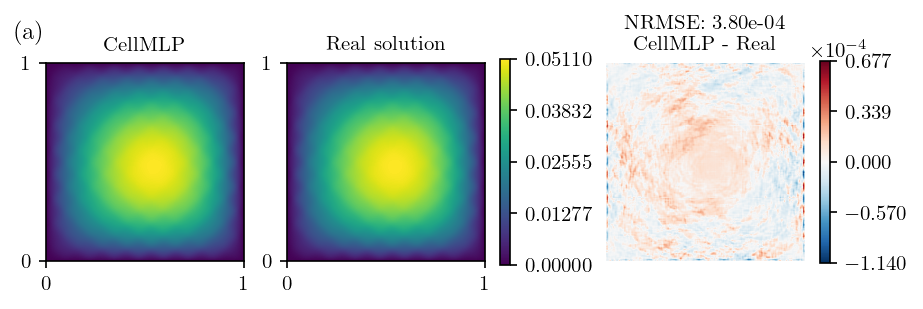

In [143]:
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import ScalarFormatter
L = 1
field_name = "CellMLP"
eps = 1e-5
resolution = x.shape[0]
xmin,ymin = 0,0
xmax,ymax = L,L
# fig = plt.figure(figsize=(14,4))
# fig = plt.figure(figsize=(6,1.7),dpi = 150)
fig, axs = plt.subplots(1, 3, figsize=(6,2), constrained_layout=True, dpi = 150)
plt.rcParams.update(params)
# plt.subplot(131)

fmax = float(np.format_float_positional(ground_truth.max(),precision = 3,unique=False, fractional=False, trim='k'))
fmin = float(np.format_float_positional(ground_truth.min(),precision = 3,unique=False, fractional=False, trim='k'))

interval = (fmax-fmin)/4
ct = (fmin, fmin + interval, fmin + 2*interval, fmin + 3*interval, fmax)
ax0 = axs[0].imshow(x,origin = 'lower',interpolation = None,
vmin=fmin,vmax=fmax)#,cmap = cm.binary)
# plt.imshow(f_plot,origin = 'lower',interpolation = None)
axs[0].set_xticks([0,resolution],[xmin,xmax])
axs[0].set_yticks([0,resolution],[ymin,ymax])
axs[0].set_title(field_name,fontsize=fs)
# plt.colorbar(ax0,ticks=ct, ax=axs[0])
# plt.axis('off')

# plt.subplot(132)
# fmax = float(np.format_float_positional(ground_truth.max(),precision = 3,unique=False, fractional=False, trim='k'))
# fmin = float(np.format_float_positional(ground_truth.min(),precision = 3,unique=False, fractional=False, trim='k'))
# interval = (fmax-fmin)/4
# ct = (fmin, fmin + interval, fmin + 2*interval, fmin + 3*interval, fmax)
ax1 = axs[1].imshow(ground_truth,origin = 'lower',interpolation = None,
vmin=fmin,vmax=fmax)#,cmap = cm.binary)
axs[1].set_xticks([0,resolution],[xmin,xmax])
axs[1].set_yticks([0,resolution],[ymin,ymax])
axs[1].set_title("Real solution", fontsize=fs)
plt.colorbar(ax1,ticks=ct, ax=axs[1], fraction=0.052)
# plt.axis('off')


# plt.subplot(133)
diff = x - ground_truth
nrmse = my_relativeL2(x, ground_truth)
fmax = float(np.format_float_positional(diff.max(),precision = 3,unique=False, fractional=False, trim='k'))
fmin = float(np.format_float_positional(diff.min(),precision = 3,unique=False, fractional=False, trim='k'))
if fmin<-eps and fmax>eps:
    ct = (fmin, 0.5*fmin, 0, 0.5*fmax, fmax)
else:
    interval = (fmax-fmin)/4
    ct = (fmin, fmin + interval, fmin + 2*interval, fmin + 3*interval, fmax)
ax2 = axs[2].imshow(diff,origin = 'lower',norm=colors.TwoSlopeNorm(vcenter=ct[2],vmin = ct[0],vmax = ct[-1]),
            interpolation = None,cmap = cm.RdBu_r)
# for spine in axs[2].spines.values():
#     spine.set_linewidth(0.0)
#     # spine.set_alpha(0.5)

# axs[2].set_xticks([0,resolution],[xmin,xmax])
# axs[2].set_yticks([0,resolution],[ymin,ymax])
# axs[2].tick_params(axis='both',  # Apply to both x and y axes
#                which='both',  # Apply to both major and minor ticks
#                width=0.5) 
axs[2].axis('off')


axs[2].set_title("NRMSE: {:.2e}\n{} - Real".format(nrmse,field_name), fontsize=fs)
color_bar = plt.colorbar(ax2,ticks=ct, ax=axs[2], fraction=0.051)
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))
color_bar.ax.yaxis.set_major_formatter(formatter)
offset_text = color_bar.ax.yaxis.get_offset_text()
offset_text.set_visible(True)
offset_text.set_position((5, 0))  # You can adjust the (3, 0) here

fig.text(0.00, 0.95, '(a)', fontsize=12, va='top', ha='left')
# plt.savefig(os.path.join(figure_path,"solution_diff_{}.pdf".format(min_file_idx)), dpi=300)

plt.show()